Heart Disease Prediction using Machine Learning

IMPORTING ESSENTIAL LIBRARIES

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import plot_importance,XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

IMPORTING AND UNDERSTANDING OUR DATASET

In [140]:
df=pd.read_csv("heart_disease_dataset.csv")

In [141]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,65,0,2.0,105,224,0,1,142,0,0.00,-0.0,1.0,2.0,1
1,51,0,0.0,109,234,1,0,147,1,0.40,2.0,2.0,1.0,1
2,63,1,1.0,140,313,1,1,131,0,3.22,2.0,1.0,3.0,1
3,53,0,2.0,120,259,1,1,147,1,0.00,1.0,0.0,2.0,1
4,42,1,0.0,137,312,1,0,123,0,0.24,2.0,3.0,2.0,0


In [142]:
df.shape

(1600, 14)

In [143]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,54.953125,0.556250,1.138125,131.297500,246.414375,0.415000,0.501875,148.708750,0.453125,1.404250,1.154375,1.055625,2.062500,0.500000
std,9.192115,0.496981,1.155912,17.185527,52.595476,0.492876,0.500153,23.083857,0.497954,1.464078,0.864442,1.241871,1.057967,0.500156
min,29.000000,0.000000,0.000000,93.000000,124.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,1.075000,1.000000,1.000000,2.000000,0.500000
75%,62.000000,1.000000,2.000000,141.000000,275.000000,1.000000,1.000000,166.000000,1.000000,2.410000,2.000000,2.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,201.000000,565.000000,1.000000,1.000000,203.000000,1.000000,7.240000,2.000000,4.000000,3.000000,1.000000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1600 non-null   int64  
 1   sex       1600 non-null   int64  
 2   cp        1600 non-null   float64
 3   trestbps  1600 non-null   int64  
 4   chol      1600 non-null   int64  
 5   fbs       1600 non-null   int64  
 6   restecg   1600 non-null   int64  
 7   thalach   1600 non-null   int64  
 8   exang     1600 non-null   int64  
 9   oldpeak   1600 non-null   float64
 10  slope     1600 non-null   float64
 11  ca        1600 non-null   float64
 12  thal      1600 non-null   float64
 13  target    1600 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 175.1 KB


Converting these columns to int because:
1. They represent Categorical Data.
Although stored as float64, these columns (cp, slope, ca, thal) actually contain discrete categorical values like 0, 1, 2, etc. These should be integers for proper interpretation.
2. Avoids Model Confusion
Machine learning models might treat float columns as continuous values. Converting to int tells the model that these are categories, not continuous numbers.


In [145]:
df[['cp','slope','ca','thal']]=df[['cp','slope','ca','thal']].astype(int)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1600 non-null   int64  
 1   sex       1600 non-null   int64  
 2   cp        1600 non-null   int64  
 3   trestbps  1600 non-null   int64  
 4   chol      1600 non-null   int64  
 5   fbs       1600 non-null   int64  
 6   restecg   1600 non-null   int64  
 7   thalach   1600 non-null   int64  
 8   exang     1600 non-null   int64  
 9   oldpeak   1600 non-null   float64
 10  slope     1600 non-null   int64  
 11  ca        1600 non-null   int64  
 12  thal      1600 non-null   int64  
 13  target    1600 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 175.1 KB


In [147]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Pivot Table checks :
How many patients(rows)exist for each thal value(0,1,2,3)

In [148]:
df.pivot_table(values='target',index='thal',aggfunc='count')

,target
thal,
0,189
1,281
2,371
3,759


Pivot Table checks :
How many patients(rows)exist for each ca value(0,1,2,3,4)

In [149]:
df.pivot_table(values='target',index='ca',aggfunc='count')

,target
ca,
0,751
1,350
2,257
3,143
4,99


We use .unique() : to identify all distinct values in a column for data validation and cleaning

In [150]:
thal_values=df['thal'].unique()
print(thal_values)
slope_values=df['slope'].unique()
print(slope_values)
restecg_values=df['restecg'].unique()
print(restecg_values)
chestpain_values=df['cp'].unique()
print(chestpain_values)
ca_values=df['ca'].unique()
print(ca_values)

[2 1 3 0]
[0 2 1]
[1 0]
[2 0 1 3]
[1 2 0 3 4]


thal = 0 is likely a misentered or invalid value, so we replace it with 3, the most common valid category, to ensure data consistency.
This helps the model learn from meaningful patterns, avoids confusion during training, and improves prediction accuracy.


In [151]:
df['thal']=df['thal'].replace(0,3)

We replace ca = 4 with 0 because 4 is either an outlier or an invalid value not typically expected in the ca (number of major vessels) feature.
Keeping it may confuse the model due to its rarity, while replacing it with 0 — the most frequent and valid value — improves data quality, balance, and model performance.

In [152]:
df['ca']=df['ca'].replace(4,0)

In [153]:
print(df['thal'].unique())

[2 1 3]


In [154]:
print(df['ca'].unique())

[1 2 0 3]


 CHECKING THE DISTRIBUTION OF TARGET VARIABLES , 
 1--> Defective Heart ,0--> Healthy Heart

In [155]:
df['target'].value_counts()

target
1    800
0    800
Name: count, dtype: int64

DATA VISUALIZATION


1. CORRELATION HEATMAP : SHOWS HOW STRONGLY EACH FEATURE IS CORRELATED WITH OTHERS,ESPECIALLY WITHY THE TARGET

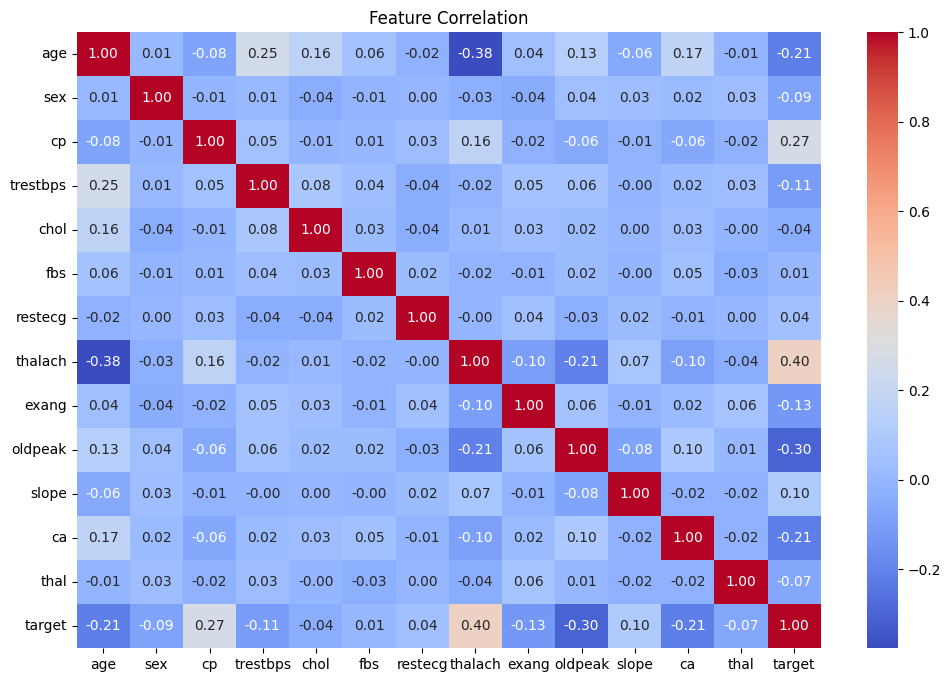

In [156]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


2. Target Count Plot: To show how many people have heart disease(target=1) vs. don't(target=0)

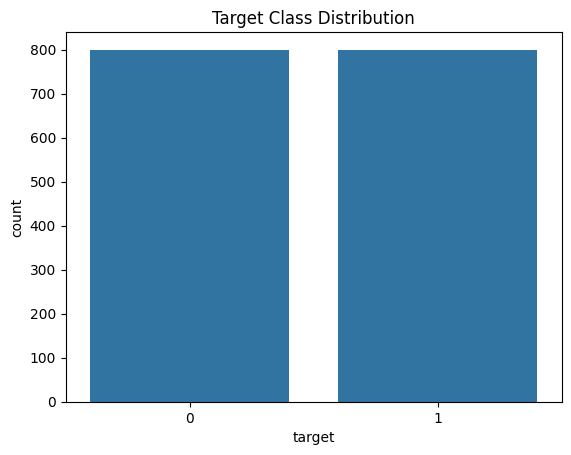

In [157]:
sns.countplot(data=df, x='target')
plt.title("Target Class Distribution")
plt.show()

3. Age vs Heart Disease(KDE PLOT): Check how age distribution varies with heart disease

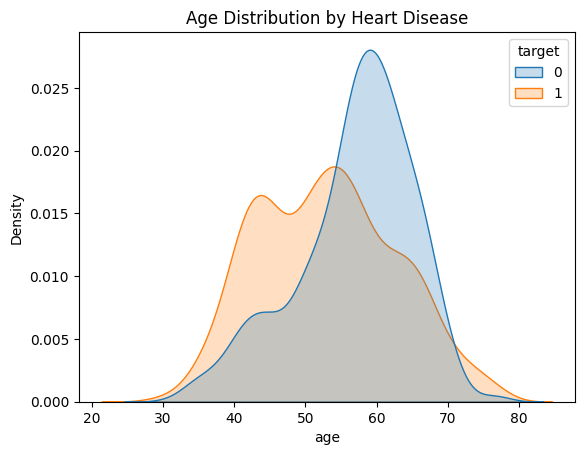

In [158]:
sns.kdeplot(data=df,x='age',hue='target',fill=True)
plt.title("Age Distribution by Heart Disease")
plt.show()

4. Sex vs Target(Bar Plot): Shows how heart disease varies across genders

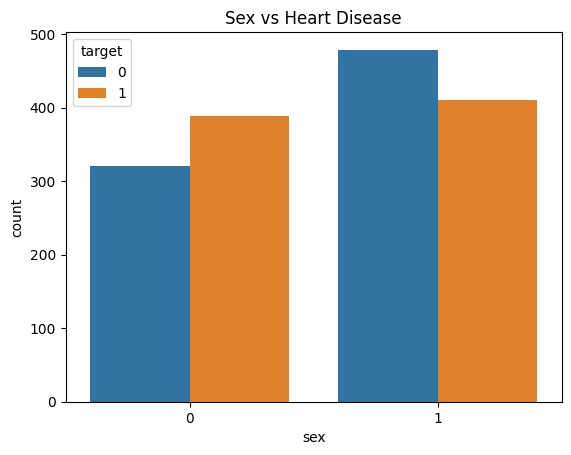

In [159]:
sns.countplot(x='sex',hue='target',data=df)
plt.title("Sex vs Heart Disease")
plt.show()

5. Chest Pain Type vs. Target : Visualize which type of chest pain (cp) is more related to heart disease

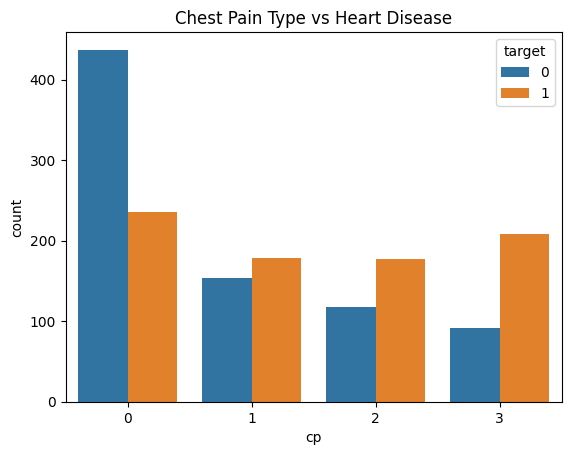

In [160]:
sns.countplot(x='cp',hue='target',data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

6. Cholesterol Distribution by Target : Understand Cholesterol level in both classes

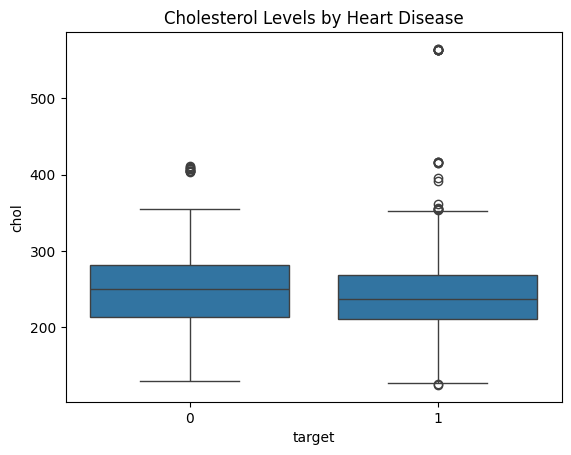

In [161]:
sns.boxplot(x='target',y='chol',data=df)
plt.title("Cholesterol Levels by Heart Disease")
plt.show()

7. Maximum Heart Rate vs Target : Compare thalach(max. heart rate) across patients   

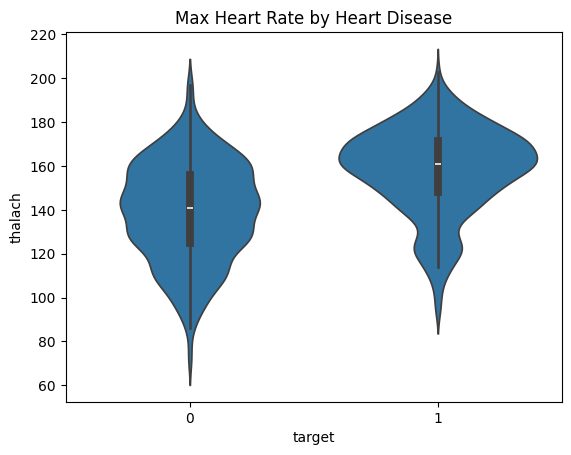

In [162]:
sns.violinplot(x='target',y='thalach',data=df)
plt.title("Max Heart Rate by Heart Disease")
plt.show()

Text(0.5, 1.0, 'Oldpeak vs Heart Disease')

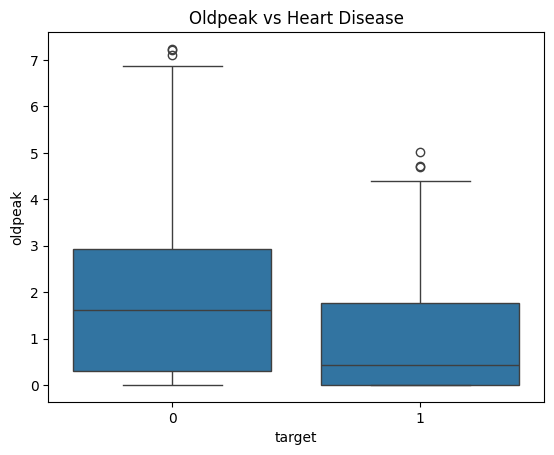

In [163]:
sns.boxplot(x='target',y='oldpeak',data=df)
plt.title("Oldpeak vs Heart Disease")

9.Distribution of Heart Disease by Sex (Bar Plot): Distribution of Heart Disease by Sex

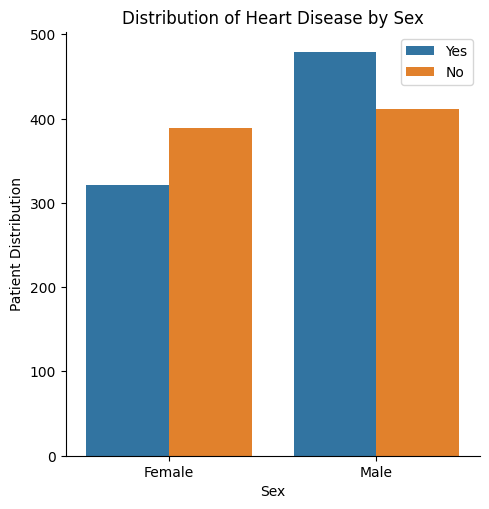

In [164]:
sns.catplot(x='sex',kind='count',data=df,hue='target',legend=False)
plt.xticks([0,1],['Female','Male'])
plt.legend(['Yes','No'])
plt.title("Distribution of Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Patient Distribution")
plt.show()

10. Pie Chart: shows the proportion of male vs female patients in the entire dataset

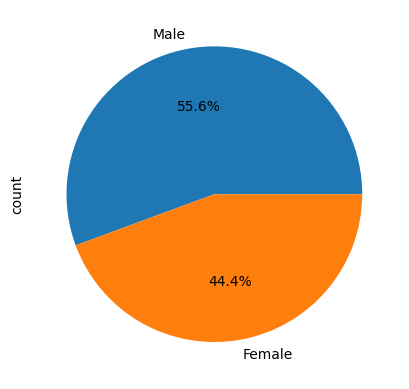

In [165]:
df.sex.value_counts().plot(kind='pie',labels={'Female','Male'},autopct='%1.1f%%')
plt.show()

11. Frequency distribution of Maximum Heart Rate i.e (thal)

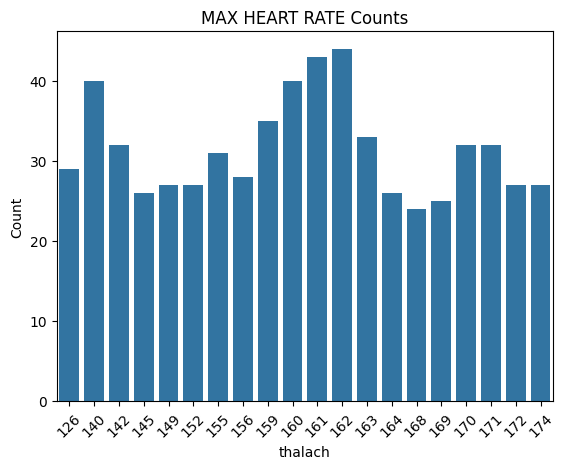

In [166]:
sns.barplot(x=df.thalach.value_counts()[:20].index,y=df.thalach.value_counts()[:20].values)
plt.xlabel('thalach')
plt.ylabel('Count')
plt.title('MAX HEART RATE Counts')
plt.xticks(rotation=45)
plt.show()

12. The  grid of histograms displays the distribution of all numerical and categorical features in the dataset. It helps us identify data imbalance, skewness, outliers, and the overall shape of each feature’s values.

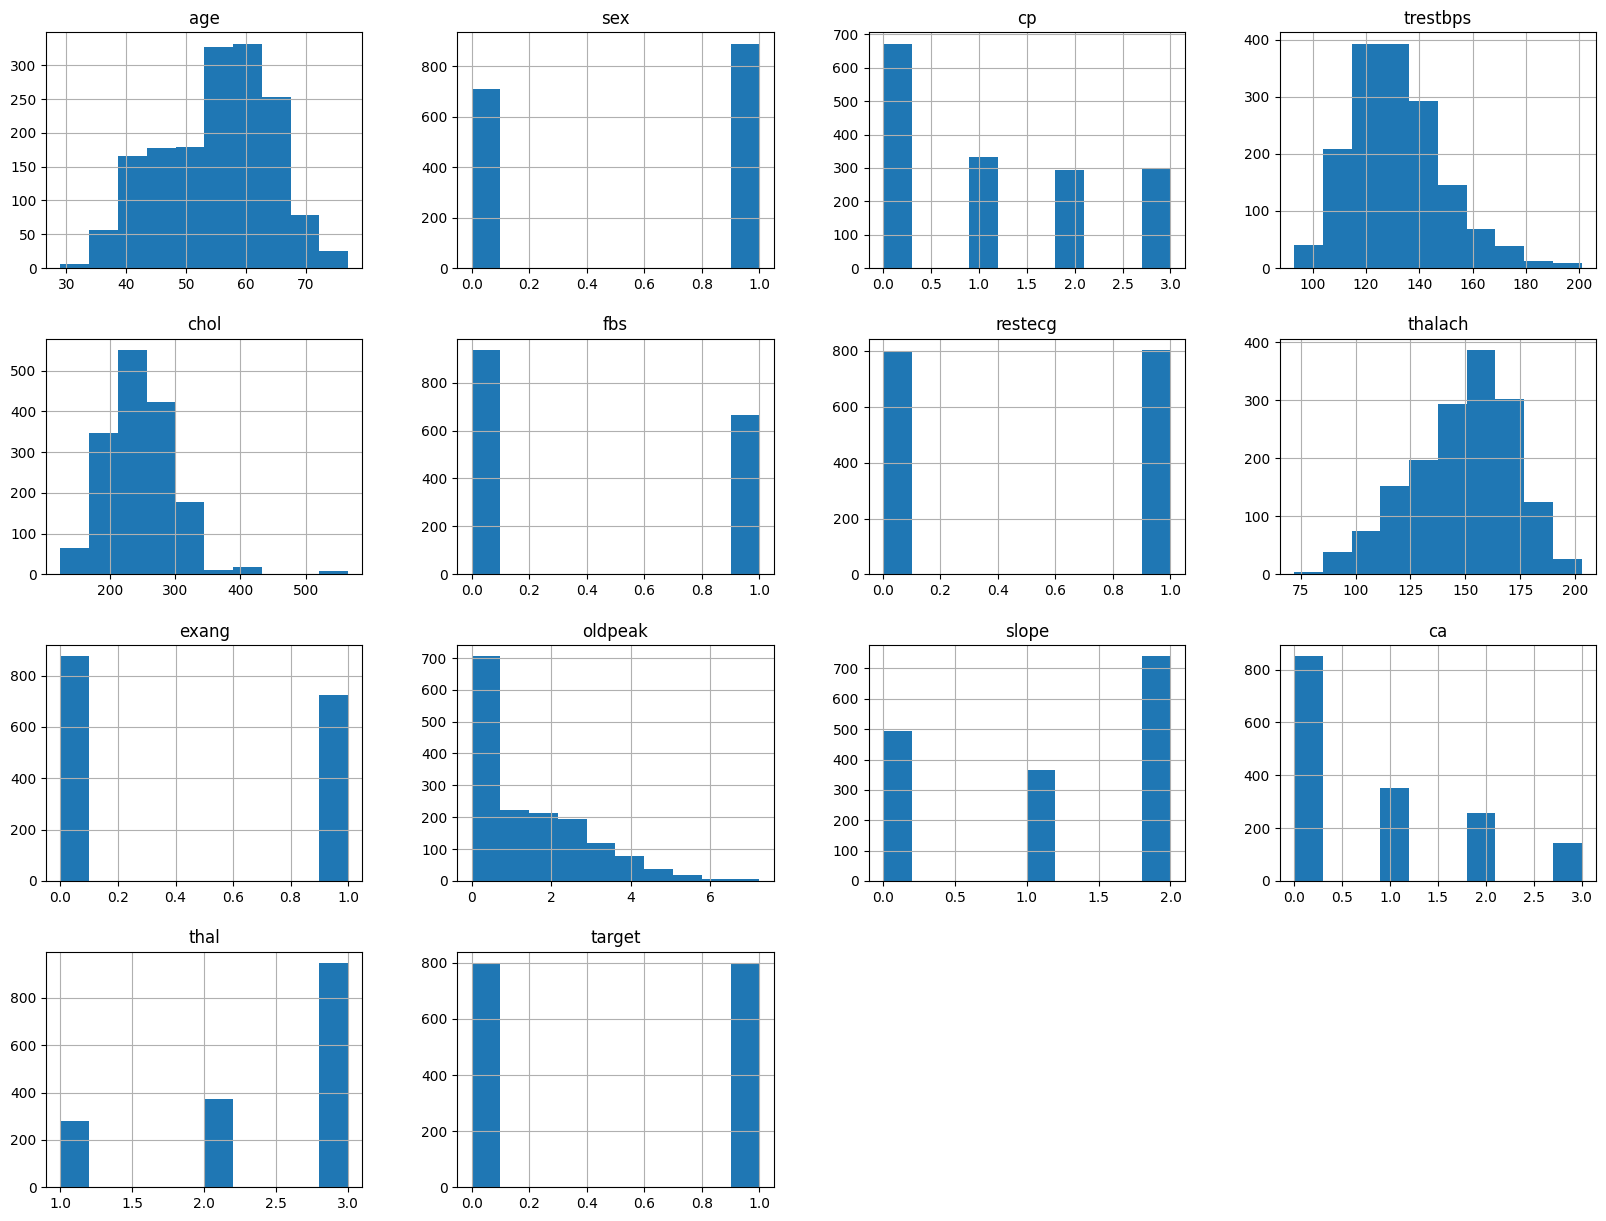

In [167]:
df.hist(figsize=(20,15))
plt.show()

13. The boxplot of Age vs Target reveals that heart disease is more common in individuals aged 45–60, reflecting real-world trends of increasing early-age heart risk due to lifestyle factors.
This matches current real-world trends of rising early-age heart issues due to lifestyle stress and unhealthy habits.

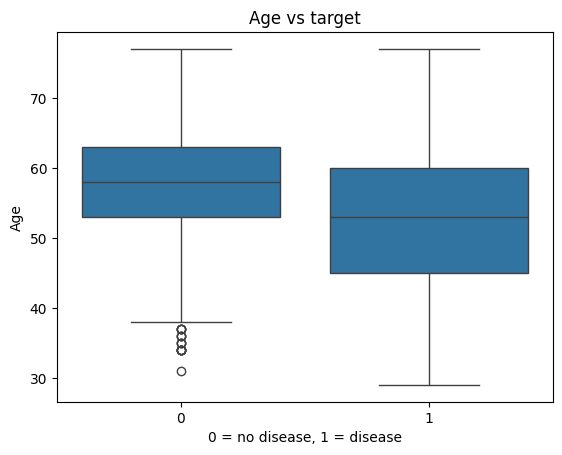

In [168]:
sns.boxplot(x=df["target"], y=df["age"])
plt.title("Age vs target")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Age")
plt.show()

14. The line plot shows that average cholesterol increases with age, peaking around 60–70, which aligns with real-world cardiovascular health patterns. 

C:\Users\hp\AppData\Local\Temp\ipykernel_6672\762753700.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_chol = df.groupby('age_bin')['chol'].mean().reset_index()


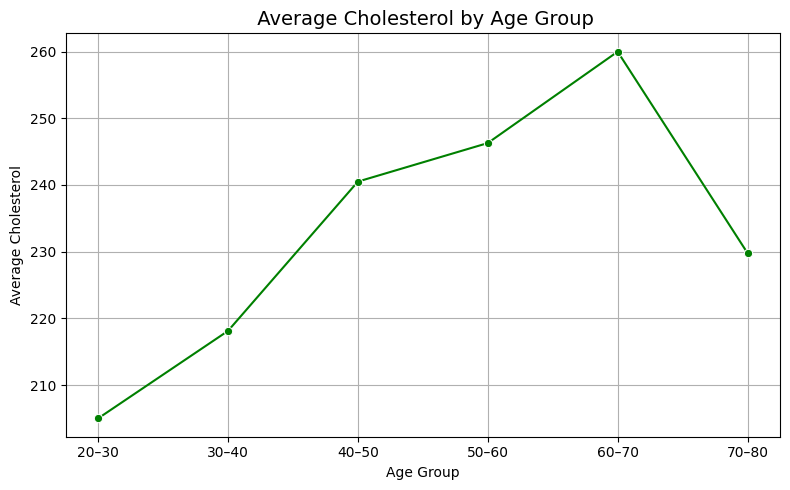

In [169]:
# 1. Create age bins
df['age_bin'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20–30', '30–40', '40–50', '50–60', '60–70', '70–80'])

# 2. Calculate average cholesterol per age group
avg_chol = df.groupby('age_bin')['chol'].mean().reset_index()

# 3. Plot the result
plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_chol, x='age_bin', y='chol', marker='o', color='green')
plt.title(" Average Cholesterol by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average Cholesterol")
plt.grid(True)
plt.tight_layout()
plt.show()

15. The countplot shows that Slope type 2 (upsloping ECG) is most common in both sexes, aligning with typical ECG response patterns in heart patients.

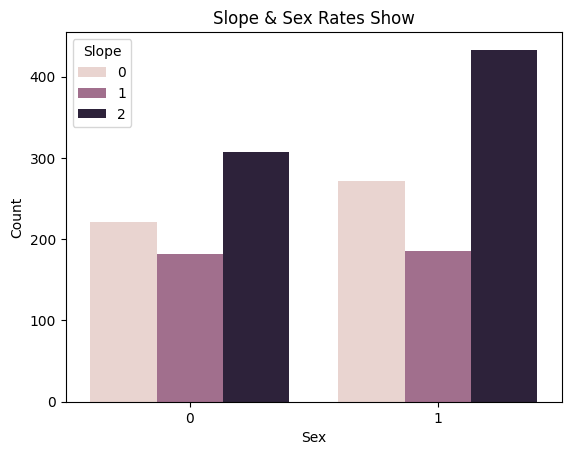

In [170]:
sns.countplot(x='sex', hue='slope', data=df)  
plt.title('Slope & Sex Rates Show')  
plt.xlabel('Sex')   
plt.ylabel('Count')   
plt.legend(title='Slope')  
plt.show()

16. The countplot reveals that chest pain type 0 (typical angina) is the most frequent

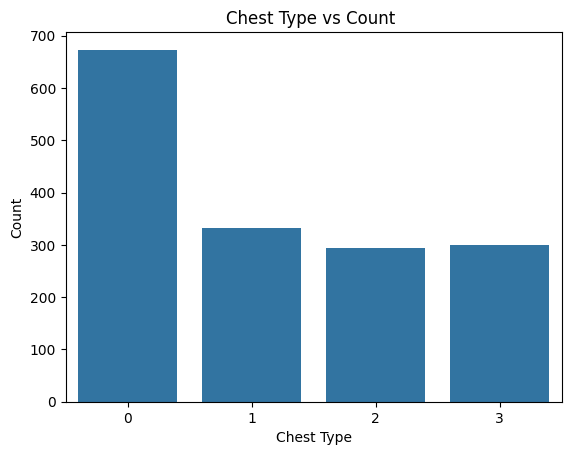

In [171]:
sns.countplot(x='cp', data=df) 
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count ')
plt.show()

17.   

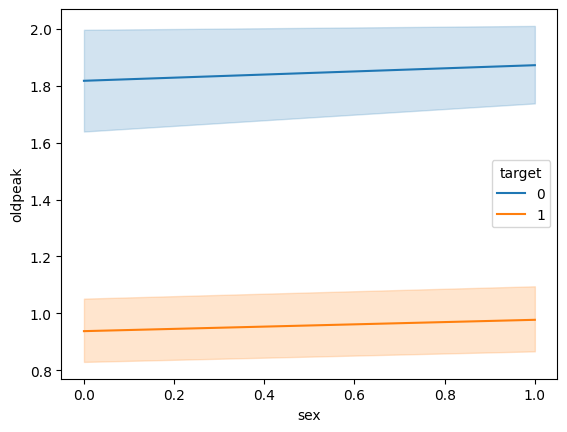

In [172]:
sns.lineplot(x="sex", y="oldpeak",hue="target",data=df)
plt.show()

In [173]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']

18.  These distribution plots helps us visualize numerical features to better understand their distribution, detect patterns, and identify outliers that impact model performance.

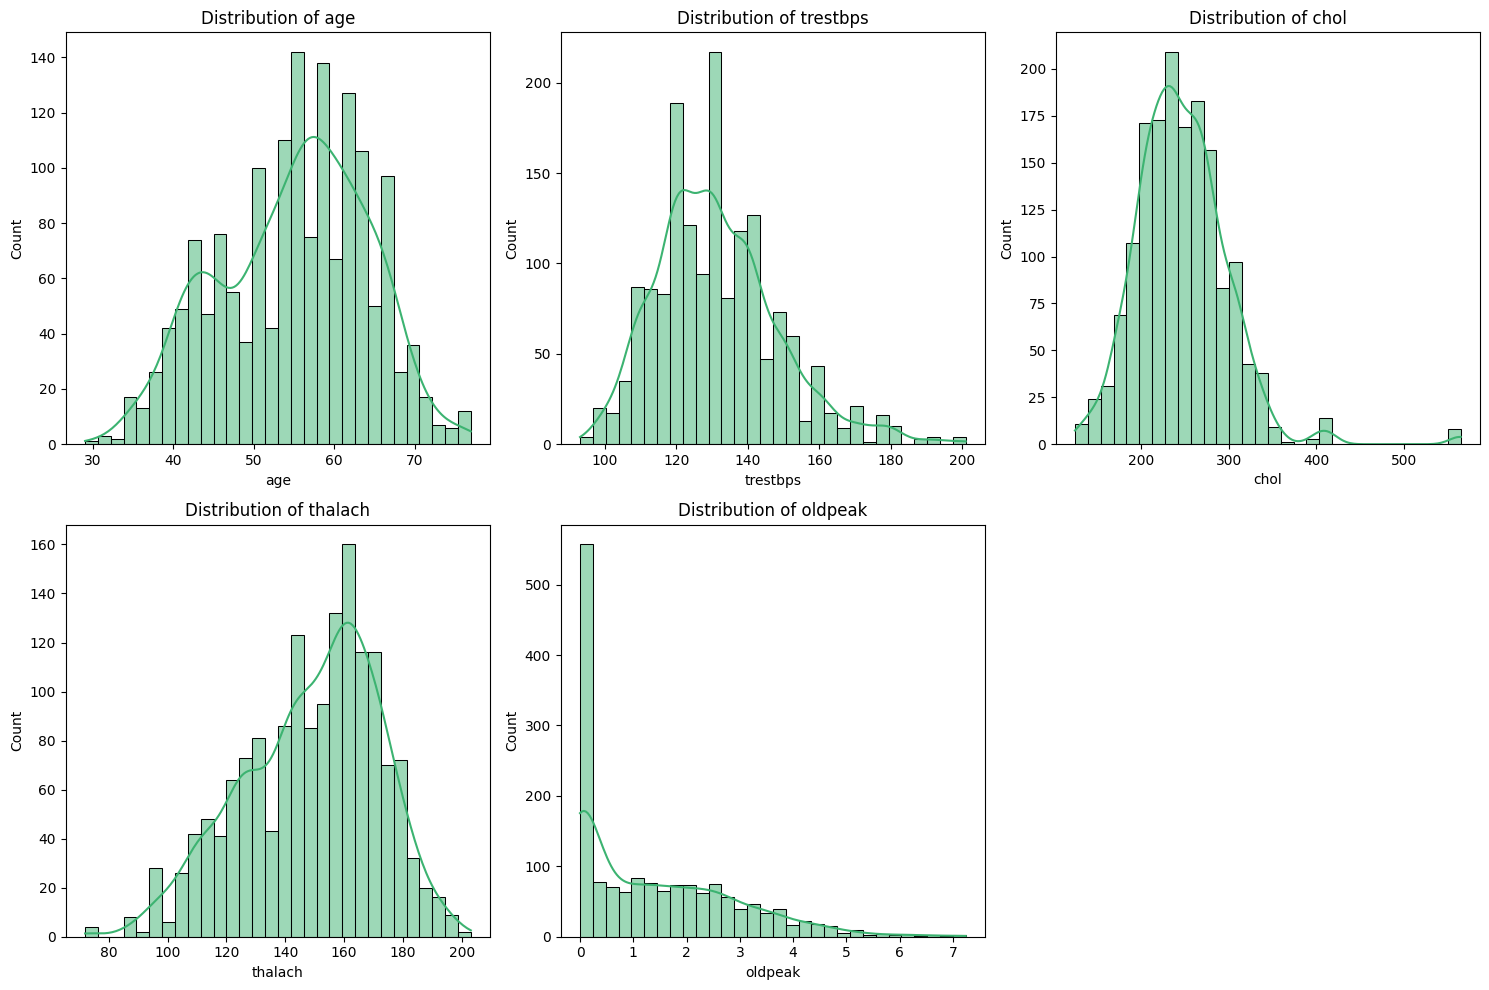

In [174]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

19.Visualizing feature distributions using violin plots to understand data spread and detect outliers in heart disease prediction.

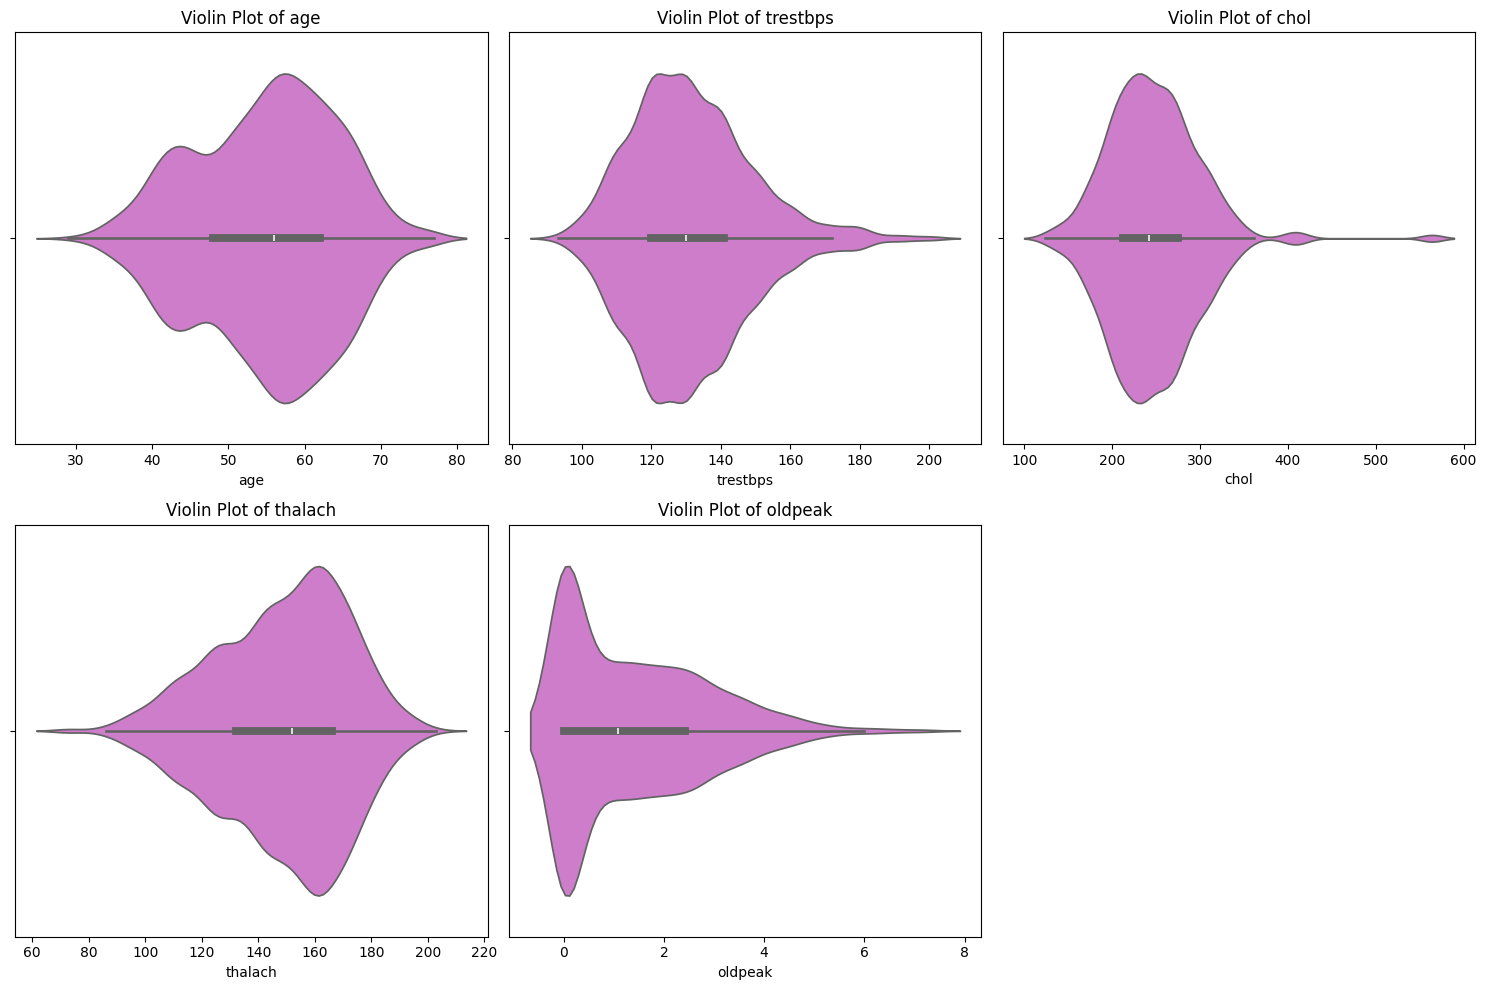

In [175]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x=df[col], color='orchid')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

20. Box Plots shows the spread and outliers of Numerical Features

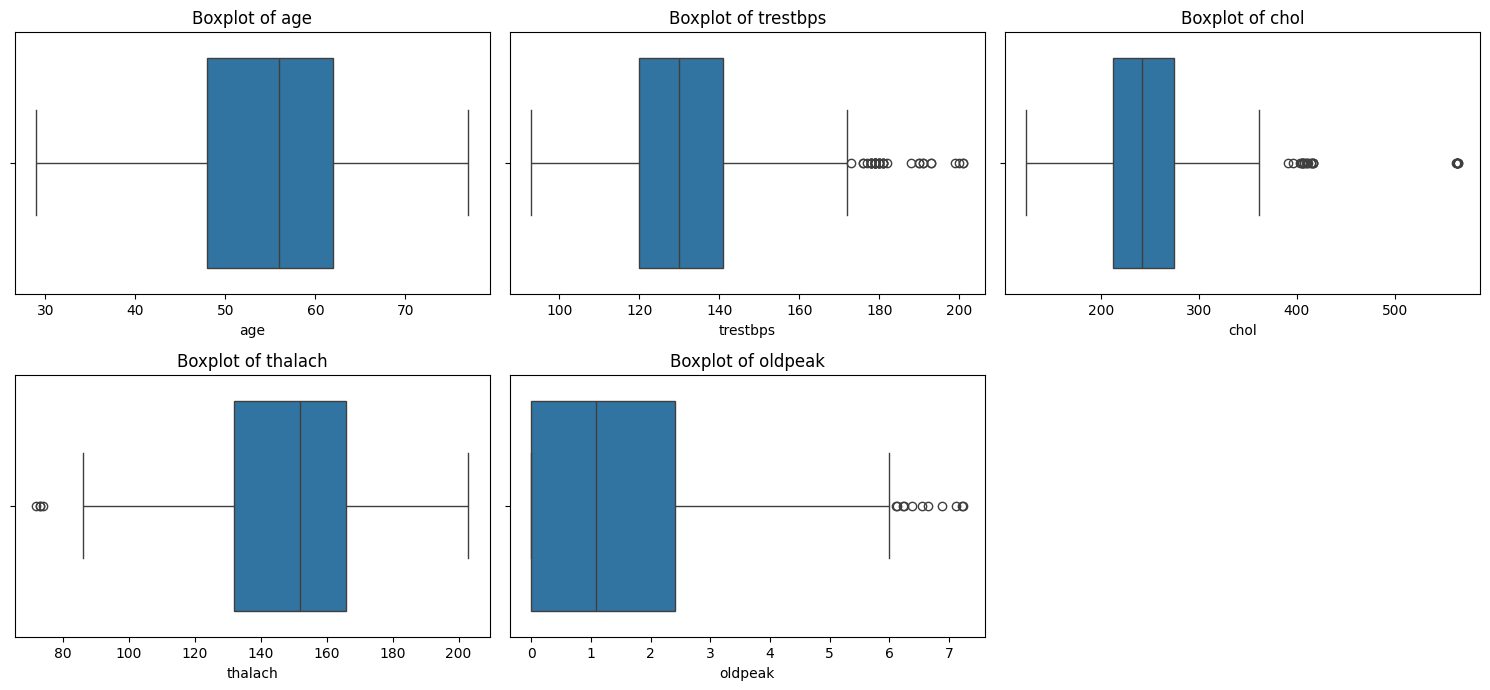

In [176]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

21.Count plot showing the distribution of categorical features split by heart disease target.

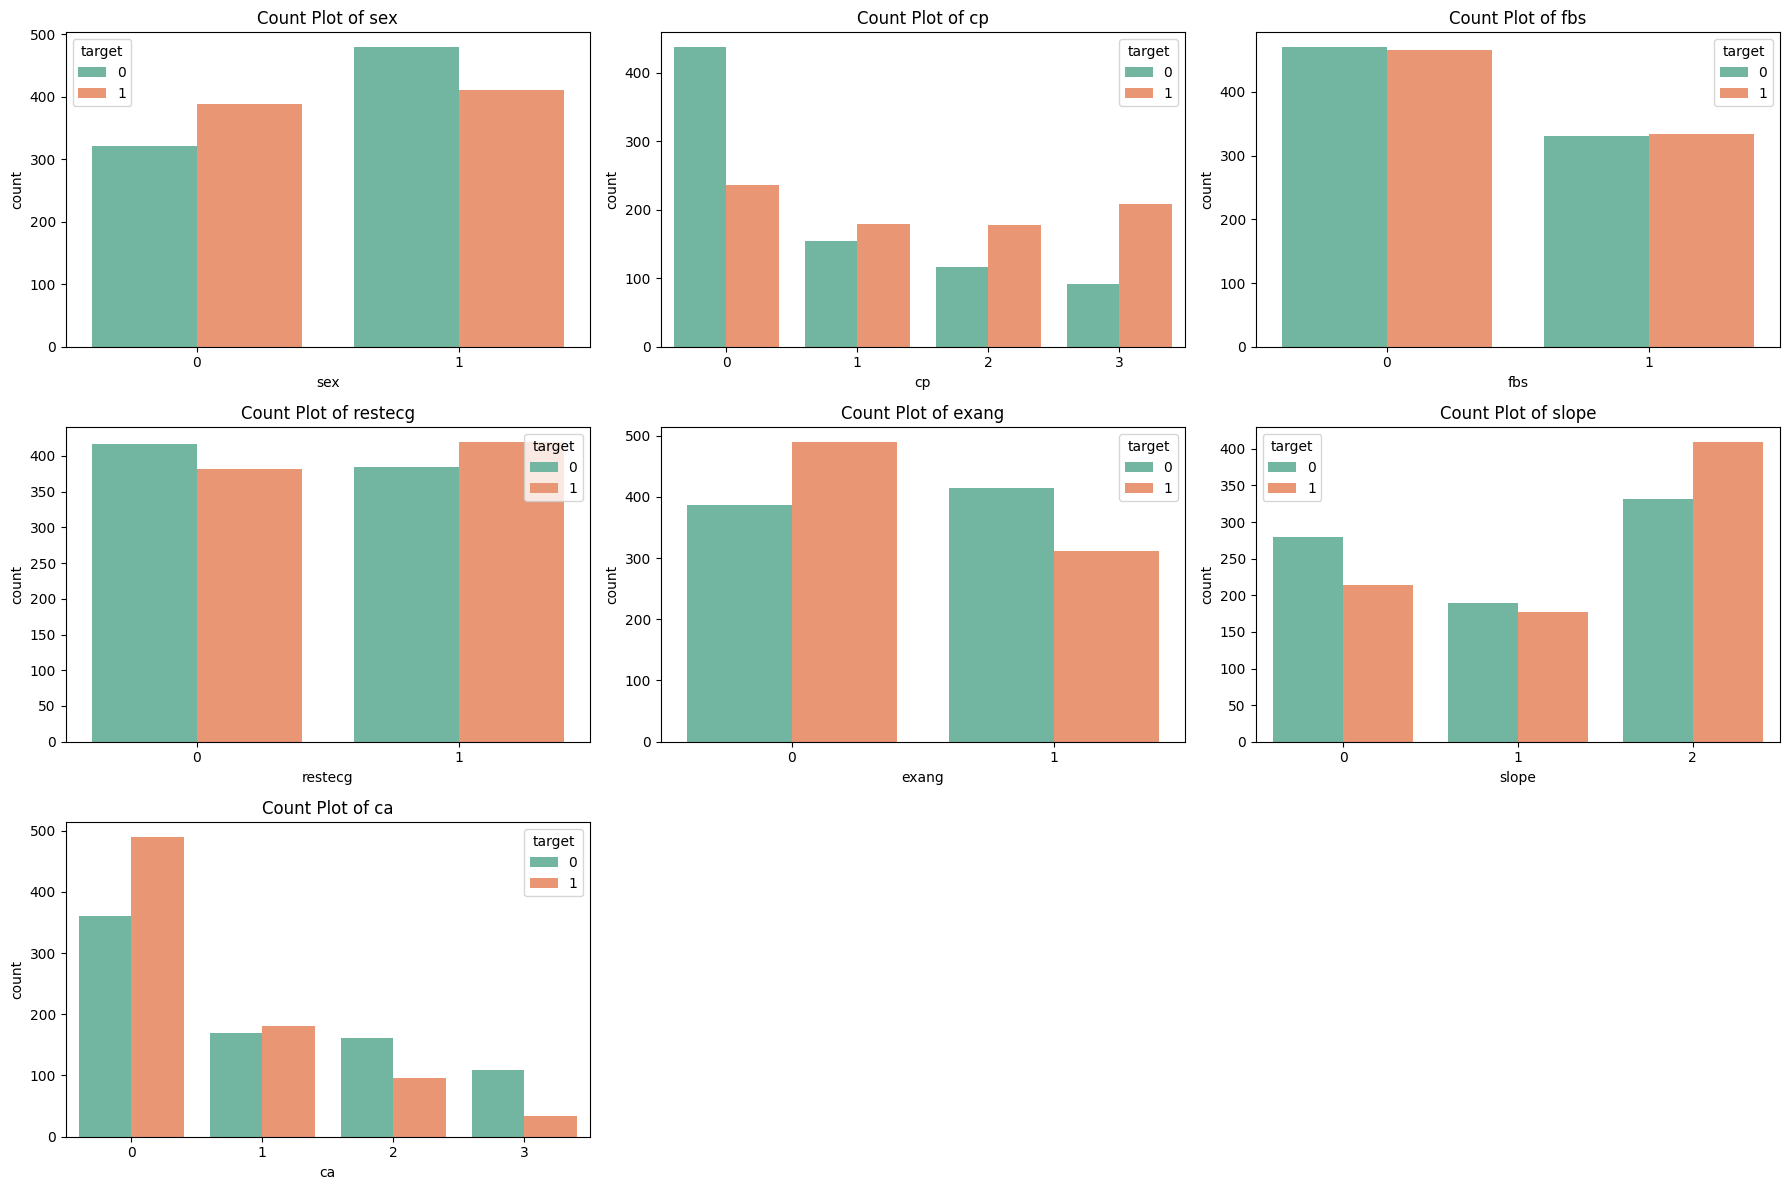

In [177]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df,hue='target',palette='Set2')
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

22. Histogram showing the distribution of resting blood pressure categorized by presence of heart disease.

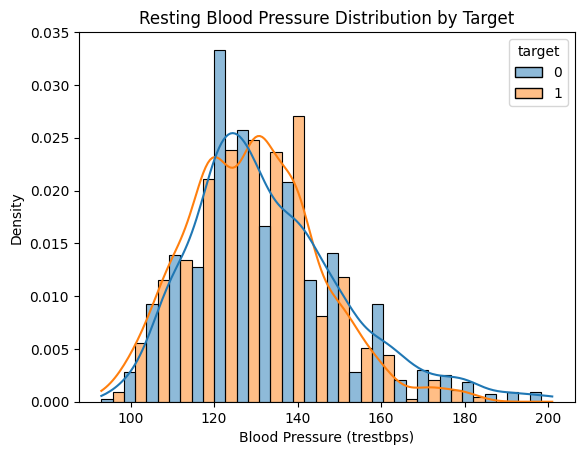

In [178]:
sns.histplot(data=df, x='trestbps', hue='target', bins=20, kde=True, stat="density", common_norm=False, multiple='dodge')
plt.title("Resting Blood Pressure Distribution by Target")
plt.xlabel("Blood Pressure (trestbps)")
plt.ylabel("Density")
plt.show()

23. 

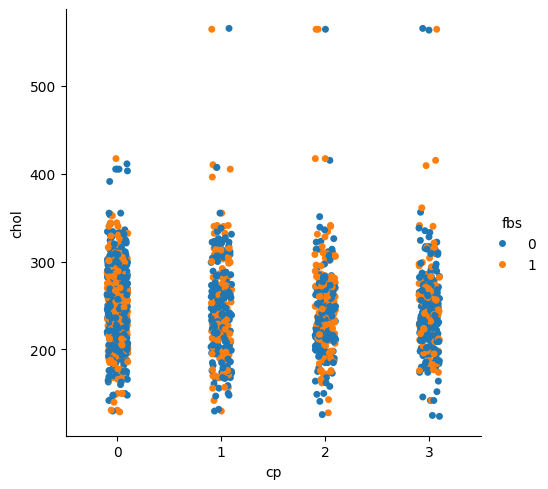

In [179]:
sns.catplot(x='cp', y='chol', data=df,hue='fbs')

24. Scatter plot visualizing the relationship between age and cholesterol, colored by heart disease target.


Text(0.5, 1.0, 'Age-Cholesterol Plot')

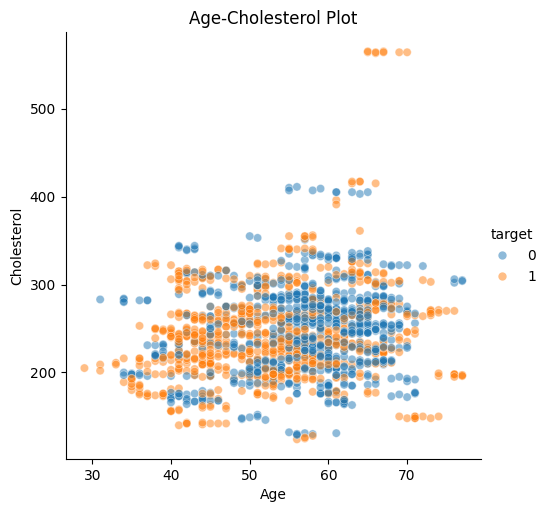

In [180]:
sns.relplot(kind = 'scatter',x = 'age', y = 'chol',alpha = 0.5, color = 'red',data=df,hue='target')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

25. Scatter plot showing correlation between cholesterol and resting blood pressure, separated by gender.

<Axes: xlabel='chol', ylabel='trestbps'>

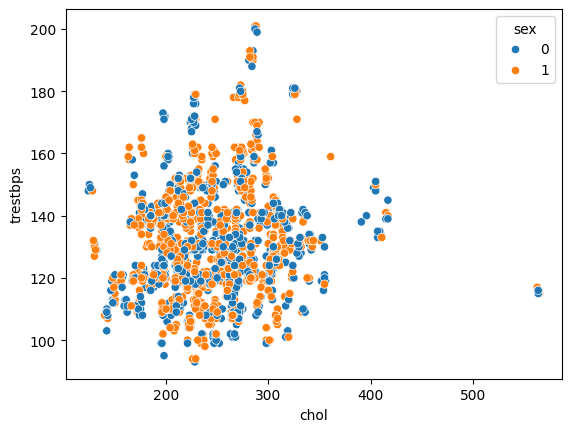

In [181]:
sns.scatterplot(y='trestbps', x="chol", hue="sex", data=df)

26. 

Text(0.5, 1.05, 'Depression in ST Segment by Target Variable')

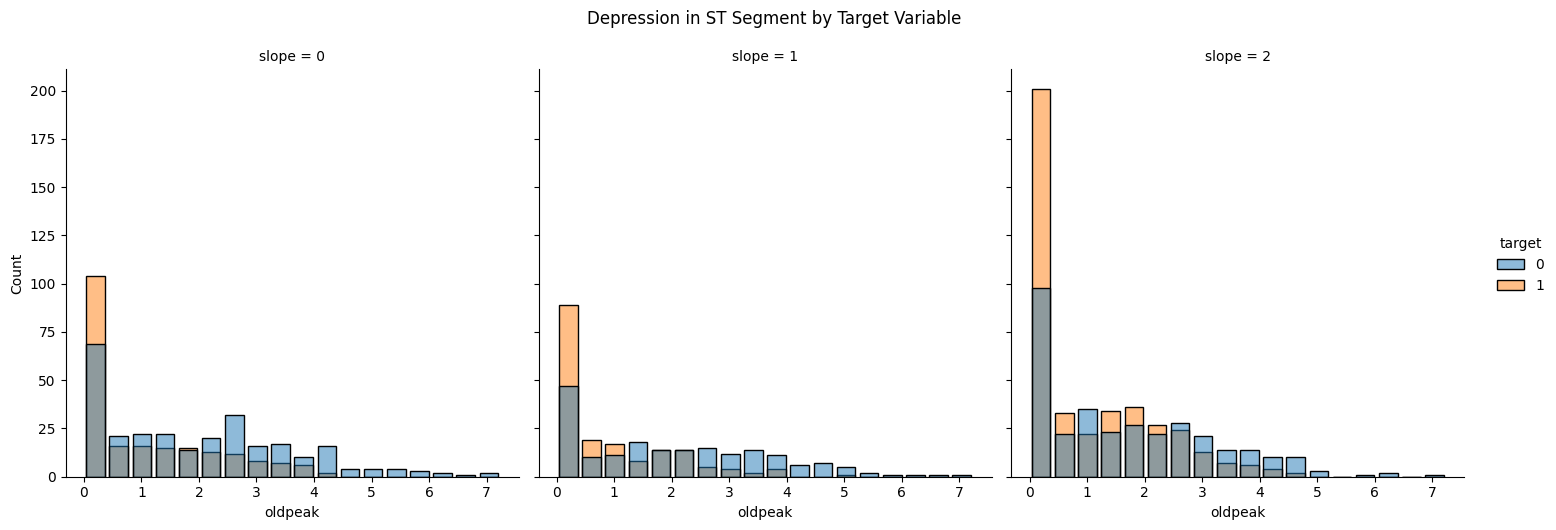

In [182]:
sns.displot(data=df,x='oldpeak',shrink=0.8,col='slope',hue='target')
plt.suptitle('Depression in ST Segment by Target Variable',y=1.05)

27 .Count plot showing chest pain type distribution among males and females.

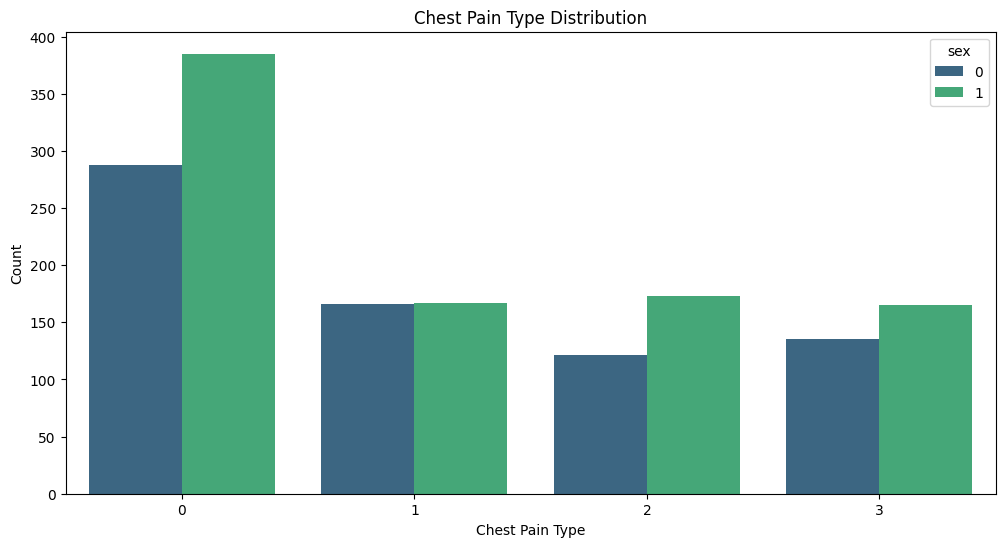

In [183]:
plt.figure(figsize=(12,6))
sns.countplot(x='cp',hue='sex', data=df,palette='viridis')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

28. Count plot visualizing the relationship between fasting blood sugar levels and heart disease.

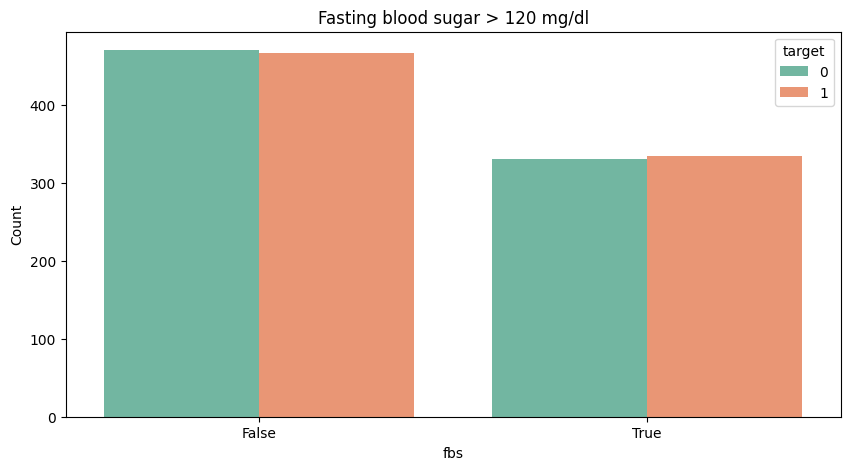

In [184]:
plt.figure(figsize=(10,5))
sns.countplot(x='fbs',hue='target', data=df,palette='Set2')
plt.title('Fasting blood sugar > 120 mg/dl')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['False','True'])
plt.show()

29. Pairplot showing relationships and distributions among key heart disease features, color-coded by diagnosis target.


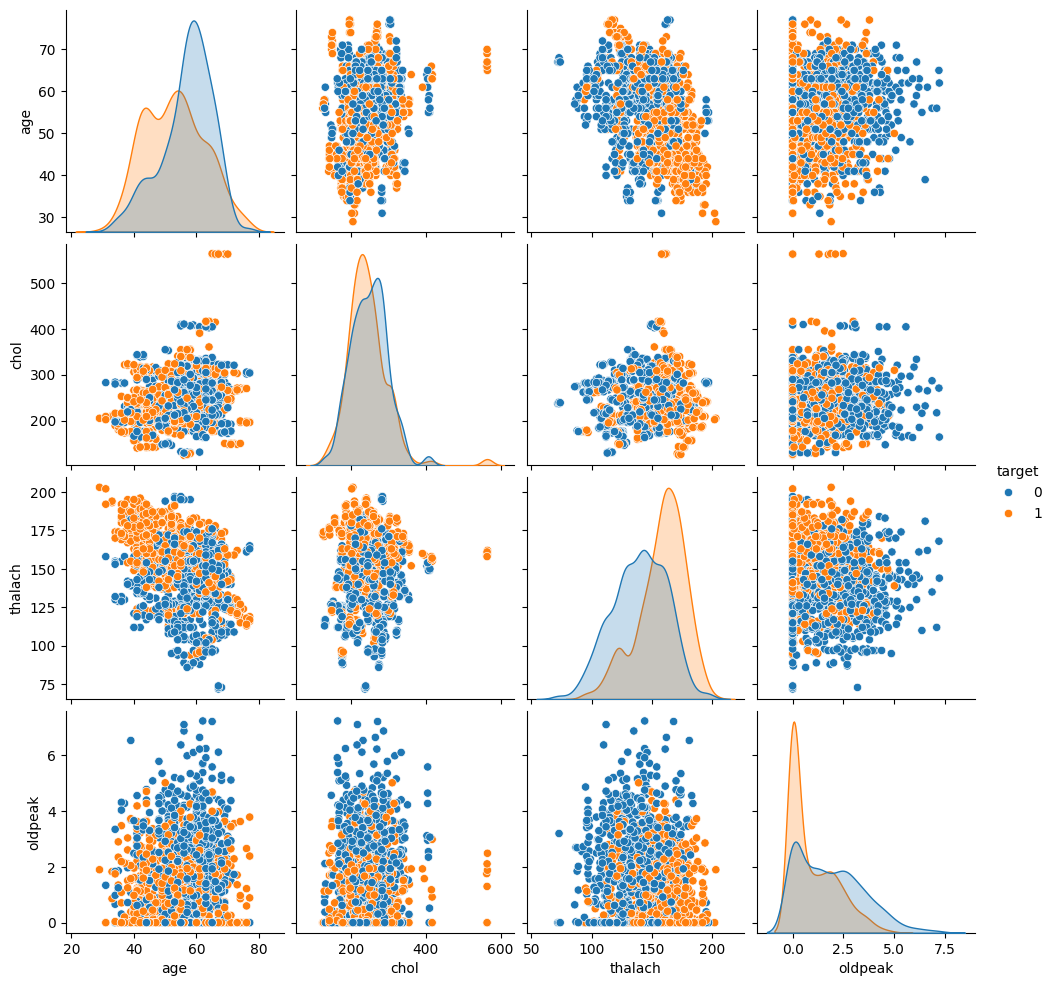

In [185]:
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak','target']], hue='target')
plt.show()

Separating input features (x) and target variable (y) to prepare the dataset for supervised learning:

In [186]:
x=df.drop(columns='target',axis=1)
y=df['target']

Splitting the Data:

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Standardizing Features:

In [194]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ValueError: could not convert string to float: '30–40'

Training XGBoost Classifier:

In [ ]:
model_1= XGBClassifier(n_estimators=100,max_depth=4,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,random_state=42)

model_1.fit(x_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = model_1.predict(x_test_scaled)

In [ ]:
# EVALUATION METRICS
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX:
[[140  24]
 [ 20 136]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       164
           1       0.85      0.87      0.86       156

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320

Accuracy Score: 0.8625


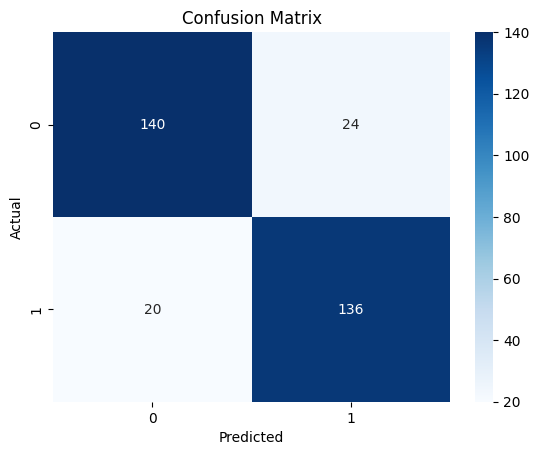

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

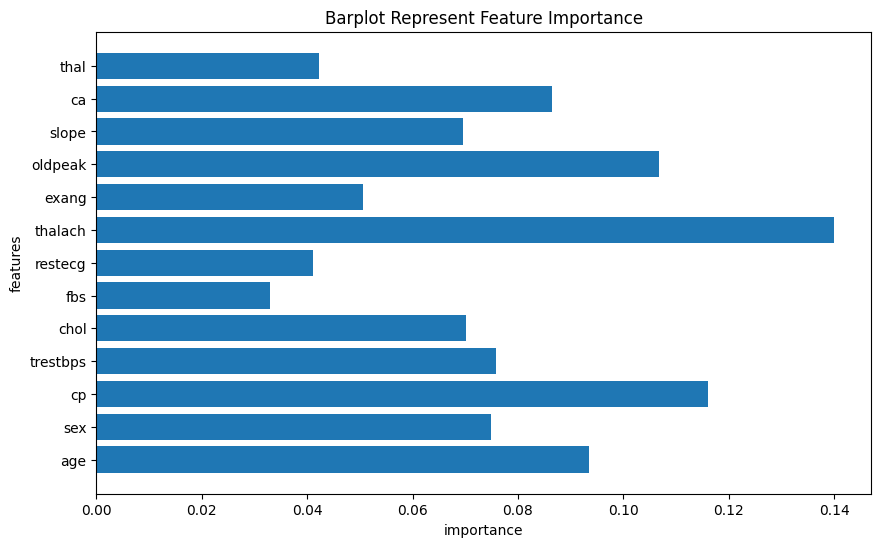

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'], 'Importance': model_1.feature_importances_})
plt.figure(figsize=(10,6))
plt.title("Barplot Represent Feature Importance")
plt.xlabel("importance")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

Training RandomForest Classifier

In [191]:
model_2=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=4)
model_2.fit(x_train_scaled,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [195]:
y_pred = model_2.predict(x_test_scaled)

In [196]:
# EVALUATION METRICS
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX:
[[124  40]
 [ 34 122]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       164
           1       0.75      0.78      0.77       156

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320

Accuracy Score: 0.76875


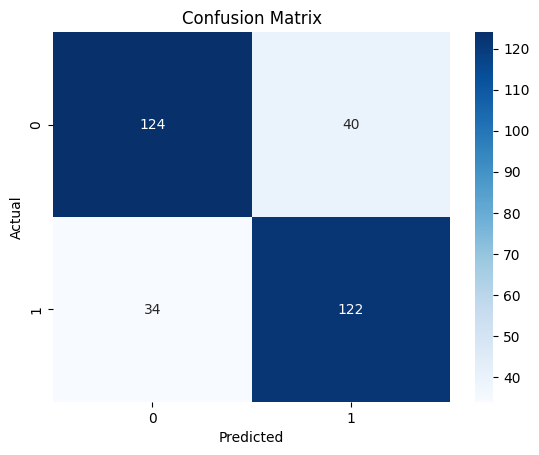

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Training LogisticRegression Classification

In [ ]:
model_3 = LogisticRegression(max_iter=1000)
model_3.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
y_pred = model_3.predict(x_test_scaled)

In [ ]:
# EVALUATION METRICS
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX:
[[124  40]
 [ 37 119]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       164
           1       0.75      0.76      0.76       156

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

Accuracy Score: 0.759375


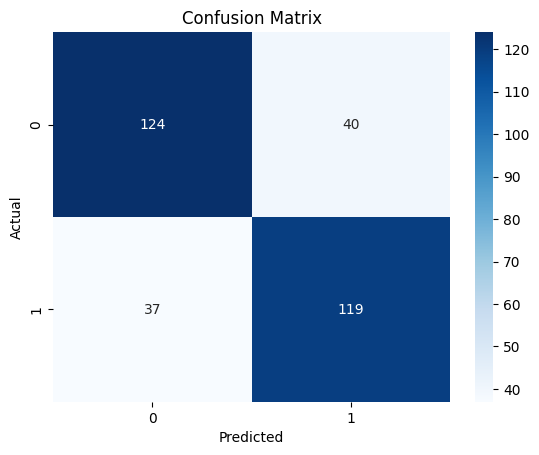

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Training DecisionTreeCLassifier

In [ ]:
model_4=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
model_4.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred=model_4.predict(x_test_scaled)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# EVALUATION METRICS
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,y_pred))
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

CONFUSION MATRIX:
[[  0 164]
 [  0 156]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.49      1.00      0.66       156

    accuracy                           0.49       320
   macro avg       0.24      0.50      0.33       320
weighted avg       0.24      0.49      0.32       320

Accuracy Score: 0.4875


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

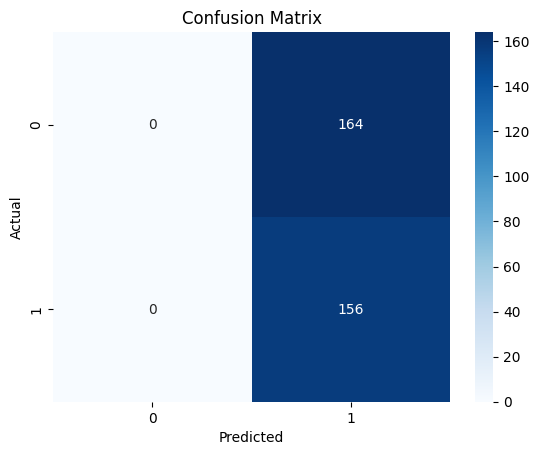

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

models = {"XGB BOOST": model_1,"Random Forest": model_2,"Logistic Regression": model_3,"Decision Tree":model_4}


results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


XGB BOOST
Accuracy: 0.8625
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       164
           1       0.85      0.87      0.86       156

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320

Confusion Matrix:
[[140  24]
 [ 20 136]]

Random Forest
Accuracy: 0.76875
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       164
           1       0.75      0.78      0.77       156

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320

Confusion Matrix:
[[124  40]
 [ 34 122]]

Logistic Regression
Accuracy: 0.759375
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      

BARPLOT TO COMPARE THE ACCURACIES B/W MODELS

C:\Users\hp\AppData\Local\Temp\ipykernel_6672\2089647752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()),palette='viridis')


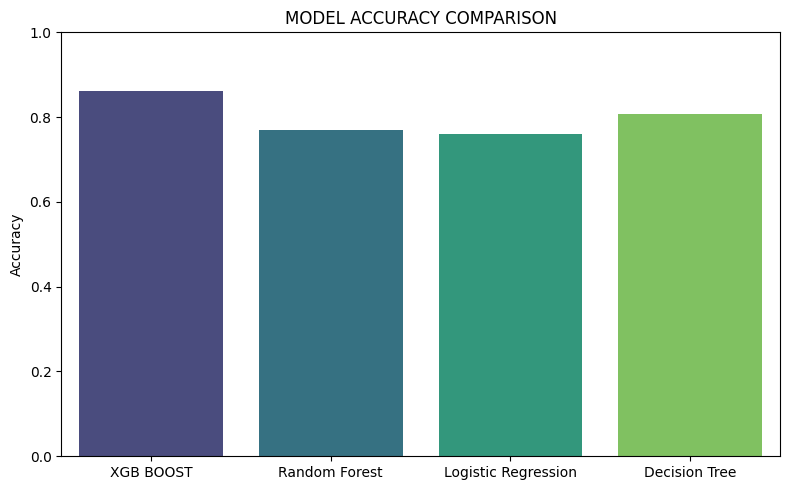

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()),palette='viridis')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('MODEL ACCURACY COMPARISON')
plt.grid(axis='y',linestyle='none')
plt.tight_layout()
plt.show()